In [ ]:
# LIN28A Is a Suppressor of ER-Associated Translation in Embryonic Stem Cells
# bam 파일을 처리해서 error의 위치 특성을 통계적으로 파악

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Receiving objects: 100% (76/76), 318.16 KiB | 2.87 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.bashrc.biolab
./root/.profile
./root/.condarc
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.vimrc
./root/.tmux.conf
--2024-06-12 21:09:43--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143808873 (137M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 137.15M   

In [ ]:
%cd /content/drive/MyDrive/2024-01_class/bioinfo_class/binfo1-work

/content/drive/MyDrive/2024-01_class/bioinfo_class/binfo1-work


In [ ]:
# !wget http://hgdownload.soe.ucsc.edu/goldenPath/mm9/bigZips/mm9.fa.gz
# !gunzip mm9.fa.gz

--2024-06-12 21:10:03--  http://hgdownload.soe.ucsc.edu/goldenPath/mm9/bigZips/mm9.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 860116499 (820M) [application/x-gzip]
Saving to: ‘mm9.fa.gz’

mm9.fa.gz            78%[==============>     ] 640.65M  57.3MB/s    eta 4s     ^C
gzip: mm9.fa already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [ ]:
!conda install -c bioconda hisat2

Channels:
 - bioconda
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: \ | / done

## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - hisat2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    ca-certificates-2024.6.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.6.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    conda-24.5.0               |  py312h7900ff3_0         1.2 MB  conda-forge
    frozendict-2.4.4           |  py312h9a8786e_0          30 KB  conda-forge
    hisat2-2.2.1               |       hdbdd923_6        16.2 MB  bioconda
    libexpat-2.6.2             |       h59595ed_0          72 KB  conda-forge
    libgcc-ng-13.2.0           

In [ ]:
!apt-get install -y samtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libhts3 libhtscodecs2
Suggested packages:
  cwltool
The following NEW packages will be installed:
  libhts3 libhtscodecs2 samtools
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 963 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhtscodecs2 amd64 1.1.1-3 [53.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhts3 amd64 1.13+ds-2build1 [390 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 samtools amd64 1.13-4 [520 kB]
Fetched 963 kB in 0s (2,167 kB/s)
Selecting previously unselected package libhtscodecs2:amd64.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../libhtscodecs2_1.1.1-3_amd64.deb ...
Unpacking libhtscodecs2:amd64 (1.1.

In [ ]:
!hisat2-build mm9.fa mm9

Settings:
  Output files: "mm9.*.ht2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Local offset rate: 3 (one in 8)
  Local fTable chars: 6
  Local sequence length: 57344
  Local sequence overlap between two consecutive indexes: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  mm9.fa
Reading reference sizes
  Time reading reference sizes: 00:01:09
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:34
  Time to read SNPs and splice sites: 00:00:00
Using parameters --bmax 491314870 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 491314870 --dcv 1024
Constructing suffix-array element generator
Build

In [ ]:
import os
import subprocess

In [ ]:
os.getcwd()

'/content/drive/MyDrive/2024-01_class/bioinfo_class/binfo1-work'

In [ ]:
def list_files_in_directory():
    current_directory = os.getcwd()
    print(f"Current directory: {current_directory}")

    for item in os.listdir(current_directory):
        item_path = os.path.join(current_directory, item)
        if os.path.isfile(item_path):
            print(f"File: {item}")
        elif os.path.isdir(item_path):
            print(f"Directory: {item}")

if __name__ == "__main__":
    list_files_in_directory()

In [ ]:
# bam_files = [
#     "CLIP-35L33G.bam",
#     "CLIP-2J3.bam",
#     "RPF-siLuc.bam",
#     "RNA-control.bam",
#     "RPF-siLin28a.bam",
#     "RNA-siLin28a.bam"
# ]

In [ ]:
# Generate a pileup file from the BAM file
!samtools mpileup -f mm9.fa ../binfo1-datapack1/CLIP-35L33G.bam > CLIP-35L33G.pileup

In [ ]:
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# subprocess.run('samtools view -b -o CLIP-let7g.bam ../binfo1-datapack1/CLIP-35L33G.bam chr9:106056039-106056126', shell=True)
# subprocess.run('samtools mpileup CLIP-let7g.bam > CLIP-let7g.pileup', shell=True)

CompletedProcess(args='samtools mpileup CLIP-let7g.bam > CLIP-let7g.pileup', returncode=0)

In [ ]:
!samtools view -b -o CLIP-let7g.bam ../binfo1-datapack1/CLIP-35L33G.bam chr9:106056039-106056126

In [ ]:
!head CLIP-let7g.pileup

chr9	106007092	N	9	^Ga^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia	<IFIGGHII
chr9	106007093	N	9	ggggggggg	AFGIEGDII
chr9	106007094	N	9	ccccccccc	EHHIGAFEH
chr9	106007095	N	9	aaaaaaaaa	?HDIFA>II
chr9	106007096	N	9	aaaaaaaaa	EHHIG@CHH
chr9	106007097	N	9	ttttttttt	=HGEGDFII
chr9	106007098	N	9	aaaaaaaaa	?HHIGDEII
chr9	106007099	N	9	g-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nn	?IEHGEDII
chr9	106007100	N	9	*********	8IBIBC@EI
chr9	106007101	N	9	*********	8IBIBC@EI


In [ ]:
!samtools mpileup -f mm9.fa CLIP-let7g.bam > CLIP-let7g.pileup

[mpileup] 1 samples in 1 input files


In [ ]:
!head CLIP-let7g.pileup

chr9	106007092	A	9	^G,^I,^H,^I,^G,^G,^H,^I,^I,	<IFIGGHII
chr9	106007093	T	9	ggggggggg	AFGIEGDII
chr9	106007094	C	9	,,,,,,,,,	EHHIGAFEH
chr9	106007095	a	9	,,,,,,,,,	?HDIFA>II
chr9	106007096	t	9	aaaaaaaaa	EHHIG@CHH
chr9	106007097	t	9	,,,,,,,,,	=HGEGDFII
chr9	106007098	g	9	aaaaaaaaa	?HHIGDEII
chr9	106007099	g	9	,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc	?IEHGEDII
chr9	106007100	g	9	*********	8IBIBC@EI
chr9	106007101	c	9	*********	8IBIBC@EI


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def parse_pileup(pileup_file):
    positions = []
    substitutions = []
    deletions = []
    insertions = []
    coverages = []

    with open(pileup_file, 'r') as file:
        for line in file:
            parts = line.strip().split()
            position = int(parts[1])
            ref_base = parts[2]
            read_bases = parts[4]

            sub_count = 0
            del_count = 0
            ins_count = 0
            coverage = 0

            i = 0
            while i < len(read_bases):
                base = read_bases[i]
                if base == '.' or base == ',':
                    coverage += 1
                elif base in 'ACGTNacgtn':
                    if base.upper() != ref_base.upper():
                        sub_count += 1
                    coverage += 1
                elif base == '*':
                    del_count += 1
                    coverage += 1  # Include deletion in coverage
                elif base == '+':
                    i += 1
                    ins_length = ''
                    while i < len(read_bases) and read_bases[i].isdigit():
                        ins_length += read_bases[i]
                        i += 1
                    ins_count += int(ins_length)
                    i -= 1  # adjust for the additional increment
                i += 1

            positions.append(position)
            substitutions.append(sub_count)
            deletions.append(del_count)
            insertions.append(ins_count)
            coverages.append(coverage)

    return pd.DataFrame({
        'Position': positions,
        'Substitution': substitutions,
        'Deletion': deletions,
        'Insertion': insertions,
        'Coverage': coverages
    })

In [ ]:
pileup_data = parse_pileup('CLIP-let7g.pileup')

In [ ]:
pileup_data.head()

,Position,Substitution,Deletion,Insertion,Coverage
0,106007092,3,0,0,12
1,106007093,9,0,0,9
2,106007094,0,0,0,9
3,106007095,0,0,0,9
4,106007096,9,0,0,9


In [ ]:
pileup_data = pileup_data[pileup_data['Coverage'] > 0].copy()

# Calculate frequencies
pileup_data['Substitution'] = pileup_data['Substitution'] / pileup_data['Coverage'] * 100
pileup_data['Deletion'] = pileup_data['Deletion'] / pileup_data['Coverage'] * 100
pileup_data['Insertion'] = pileup_data['Insertion'] / pileup_data['Coverage'] * 100

In [ ]:
pileup_data.head(10)

,Position,Substitution,Deletion,Insertion,Coverage
0,106007092,208.333333,0.000000,0.0,12
1,106007093,1111.111111,0.000000,0.0,9
2,106007094,0.000000,0.000000,0.0,9
3,106007095,0.000000,0.000000,0.0,9
4,106007096,1111.111111,0.000000,0.0,9
5,106007097,0.000000,0.000000,0.0,9
6,106007098,1111.111111,0.000000,0.0,9
7,106007099,123.456790,0.000000,0.0,27
8,106007100,0.000000,1111.111111,0.0,9
9,106007101,0.000000,1111.111111,0.0,9


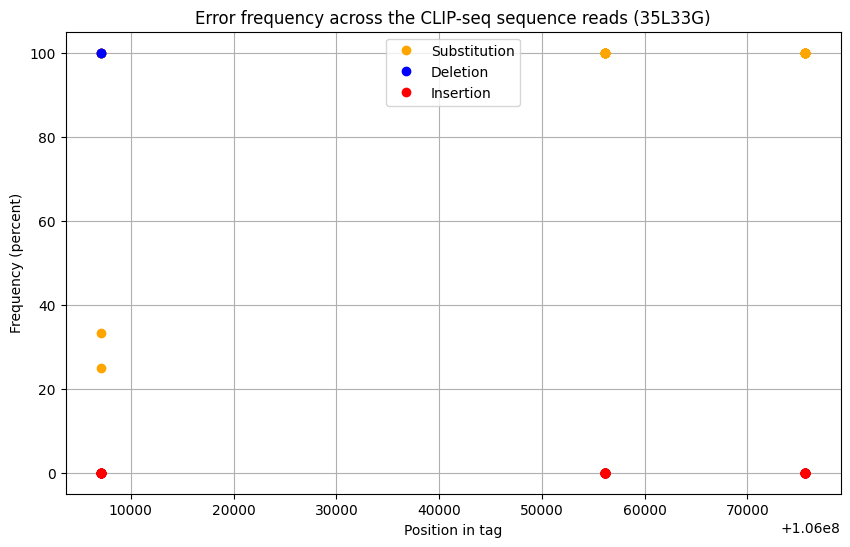

In [ ]:
# Plot the error frequencies
plt.figure(figsize=(10, 6))
plt.plot(pileup_data['Position'], pileup_data['Substitution'], label='Substitution', color='orange', marker='o', linestyle='None')
plt.plot(pileup_data['Position'], pileup_data['Deletion'], label='Deletion', color='blue', marker='o', linestyle='None')
plt.plot(pileup_data['Position'], pileup_data['Insertion'], label='Insertion', color='red', marker='o', linestyle='None')
plt.xlabel('Position in tag')
plt.ylabel('Frequency (percent)')
plt.title('Error frequency across the CLIP-seq sequence reads (35L33G)')
plt.legend()
plt.grid(True)
plt.show()

# 진행방향 변경
## 원래는 bam 파일을 직접 가공하고 reference genome을 이용해 error frequency를 구하려 했으나, 성공하지 못함 (S2C 구현)

## 따라서 Lin28A binding motif and position-specific probabilities를 확인하고자 함.

In [ ]:
!pip install pysam biopython logomaker matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 34.4 MB/s eta 0:00:00


In [ ]:
import pysam
import pandas as pd
from Bio import motifs
from Bio.Seq import Seq
import logomaker
import matplotlib.pyplot as plt

In [ ]:
!samtools quickcheck CLIP-let7g.bam

In [ ]:
!grep 'chr9' gencode.gtf | grep '106056039' | grep '106056126'

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


In [ ]:
!samtools view CLIP-let7g.bam chr9:106056039-106056126 | head

SRR458758.222778	16	chr9	106007092	38	8M2D2M68520N16M1S	*	0	0	AGCAATAGCCCAAATCAGGGCTCATTT	<AE?E=??8BB?DGBGG=4<?:477>=	MD:Z:8^AA2T15	NH:i:1	HI:i:1	NM:i:3	SM:i:38	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-
SRR458758.2480600	16	chr9	106007092	40	8M2D2M68520N16M1S	*	0	0	AGCAATAGCCCAAATCAGGGCTCATTT	IFHHHHHIIHHIIIHIIIHIEGIIGI?	MD:Z:8^AA2T15	NH:i:1	HI:i:1	NM:i:3	SM:i:40	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-
SRR458758.3458120	16	chr9	106007092	39	8M2D2M68520N16M1S	*	0	0	AGCAATAGCCCAAATCAGGGCTCATTT	FGHDHGHEBCEEEBHGHFGFEGDGGGB	MD:Z:8^AA2T15	NH:i:1	HI:i:1	NM:i:3	SM:i:39	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-
SRR458758.4751679	16	chr9	106007092	40	8M2D2M68520N16M1S	*	0	0	AGCAATAGCCCAAATCAGGGCTCATTT	IIIIIEIHIIIIIIHIIIIIIFIIIFB	MD:Z:8^AA2T15	NH:i:1	HI:i:1	NM:i:3	SM:i:40	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-
SRR458758.20230716	16	chr9	106007092	38	8M2D2M68520N16M1S	*	0	0	AGCAATAGCCCAAATCAGGGCTCATTT	GEGFGGGGBEGEGG@GGEGDDEBGGDG	MD:Z:8^AA2T15	NH:i:1	HI:i:1	NM:i:3	SM:i:38	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-
SRR458758.27335658	16	chr9	106007092	38	

In [ ]:
bam_file = 'CLIP-let7g.bam'
region = 'chr9:106056039-106056126'

def extract_sequences_debug(bam_file, region):
    samfile = pysam.AlignmentFile(bam_file, "rb")
    sequences = []

    region_split = region.split(':')
    chr_name = region_split[0]
    start, end = map(int, region_split[1].split('-'))

    print(f"Fetching reads from {chr_name}:{start}-{end}")  # 디버깅

    for read in samfile.fetch(chr_name, start, end):
        print(f"Read found: {read.query_name}")  # 디버깅
        sequences.append(read.query_sequence)

    samfile.close()
    return sequences

# sequence 출력
sequences = extract_sequences_debug(bam_file, region)
print("Extracted Sequences:", sequences)  # 디버깅

# 길이가 일정하지 않음... 같게 만들어줘야 함

Fetching reads from chr9:106056039-106056126
Read found: SRR458758.222778
Read found: SRR458758.2480600
Read found: SRR458758.3458120
Read found: SRR458758.4751679
Read found: SRR458758.20230716
Read found: SRR458758.27335658
Read found: SRR458758.28523353
Read found: SRR458758.28560169
Read found: SRR458758.31275402
Read found: SRR458758.1285605
Read found: SRR458758.1781701
Read found: SRR458758.2971700
Read found: SRR458758.3733595
Read found: SRR458758.4234787
Read found: SRR458758.5953405
Read found: SRR458758.7173425
Read found: SRR458758.10131645
Read found: SRR458758.11268531
Read found: SRR458758.13695523
Read found: SRR458758.14258113
Read found: SRR458758.18669098
Read found: SRR458758.18873276
Read found: SRR458758.19631005
Read found: SRR458758.19993256
Read found: SRR458758.20558101
Read found: SRR458758.21882571
Read found: SRR458758.22125012
Read found: SRR458758.27663376
Read found: SRR458758.27754906
Read found: SRR458758.27994395
Read found: SRR458758.28921167
Read f

In [ ]:
!samtools index CLIP-let7g.bam

In [ ]:
bam_file = 'CLIP-let7g.bam'
reference_fasta = 'mm9.fa'

In [ ]:
def extract_uniform_length_sequences(bam_file, region='chr9:106056039-106056126', flank=10):
    samfile = pysam.AlignmentFile(bam_file, "rb")
    sequences = []

    region_split = region.split(':')
    chr_name = region_split[0]
    start, end = map(int, region_split[1].split('-'))


    midpoint = (start + end) // 2

    for read in samfile.fetch(chr_name, start, end):
        seq = read.query_sequence
        if len(seq) >= 2 * flank + 1:
            seq_start = max(0, len(seq)//2 - flank)
            seq_end = seq_start + 2 * flank + 1
            extracted_seq = seq[seq_start:seq_end]
            sequences.append(extracted_seq)

    samfile.close()
    return sequences

In [ ]:
sequences = extract_uniform_length_sequences(bam_file)
print("Extracted Sequences:", sequences)  # Debugging: Print extracted sequences

Extracted Sequences: ['AATAGCCCAAATCAGGGCTCA', 'AATAGCCCAAATCAGGGCTCA', 'AATAGCCCAAATCAGGGCTCA', 'AATAGCCCAAATCAGGGCTCA', 'AATAGCCCAAATCAGGGCTCA', 'AATAGCCCAAATCAGGGCTCA', 'AATAGCCCAAATCAGGGCTCA', 'AATAGCCCAAATCAGGGCTCA', 'AATAGCCCAAATCAGGGCTCA', 'AGTTTGTACAGTTTGAGGGTC', 'CAGTTTGAGGGTCTATGATAC', 'TTGTACAGTTTGAGGGTCTAT', 'TTGTACAGTTTGAGGGTCTAT', 'CAGTTTGAGGGTCTATGATAC', 'TTGTACAGTTTGAGGGTCTAT', 'TTGTACAGTTTGAGGGTCTAT', 'AGTTTGTACAGTTTGCGGGTC', 'CAGTTTGAGGGTCTATGATAC', 'CAGTTTGAGGGTCTATGATAC', 'CAGTTTGAGGGTCTATGATAC', 'AGTTTGTACAGTTTGAGGGTC', 'AGTTTGTACAGTTTGAGGGTC', 'CAGTTTGAGGGTCTATGATAC', 'TTGTACAGTTTGAGGGTCTAT', 'CAGTTTGAGGGTCTATGATAC', 'AGTTTGTACAGTTTGAGGGTC', 'TTGTACAGTTTGAGGGTCTAT', 'AGTTTGTACAGTTTGAGGGTC', 'TTGTACAGTTTGAGGGTCTAT', 'TTGTACAGTTTGAGGGTCTAT', 'AGTTTGTACAGTTTGAGGGTC', 'TTGTACAGTTTGAGGGTCTAT', 'CGGTACAAGAGATAACTGTAC', 'CGGTACAAGAGATAACTGTAC', 'CGGTACAAGAGATAACTGTAC', 'CGGTACAAGAGATAACTGTAC', 'CGGTACAAGAGATAACTGTAC', 'CGGTACAAGAGATAACTGTAC', 'CGGTACAAGAGATAACTGTAC', 'CG

In [ ]:
# 추출된 서열 확인
if len(sequences) == 0:
    print("No sequences were extracted. Please check the region coordinates and BAM file.")


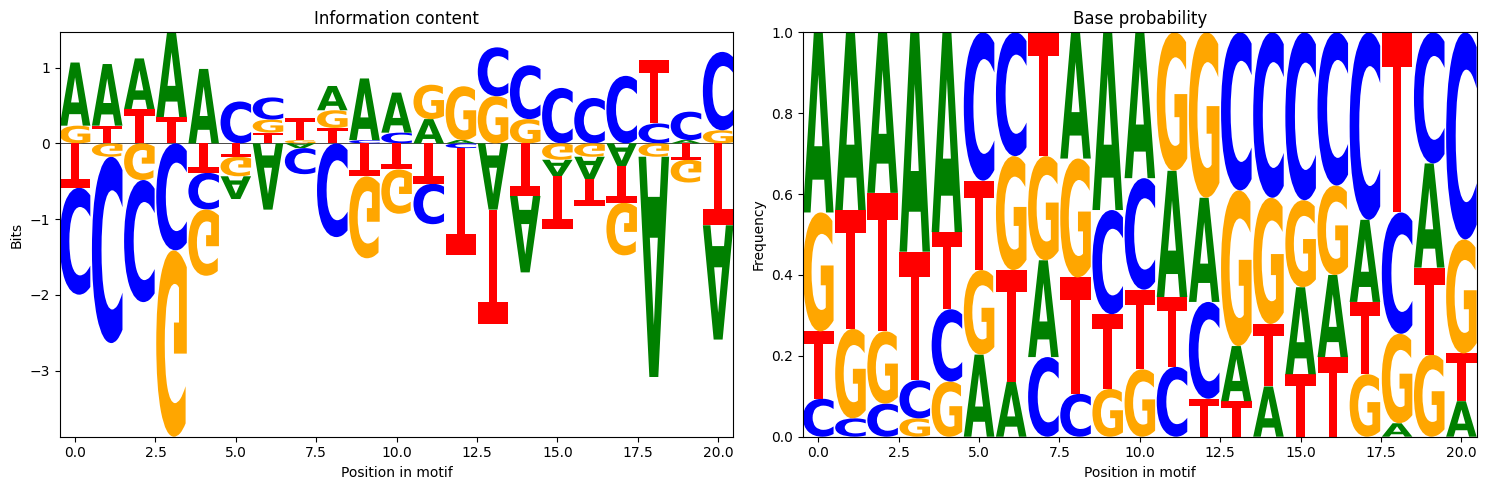

In [ ]:
# 위에서 가지고 온 서열들을 Bio.obj 로 변경
if sequences:
    seq_objs = [Seq(seq) for seq in sequences]

    m = motifs.create(seq_objs)

    # Information Plot 계산
    info_content = m.counts.normalize(pseudocounts=0.5).log_odds()
    info_content_df = pd.DataFrame(info_content)

    # 염기 비율
    base_prob = m.counts.normalize(pseudocounts=0.5)
    base_prob_df = pd.DataFrame(base_prob, columns=list("ACGT"))

    # Plot 그리기
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot information content
    logomaker.Logo(info_content_df, ax=axes[0])
    axes[0].set_title('Information content')
    axes[0].set_ylabel('Bits')
    axes[0].set_xlabel('Position in motif')

    # Plot base probability
    logomaker.Logo(base_prob_df, ax=axes[1])
    axes[1].set_title('Base probability')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xlabel('Position in motif')

    plt.tight_layout()
    plt.show()
else:
    print("No sequences were available for motif creation.")

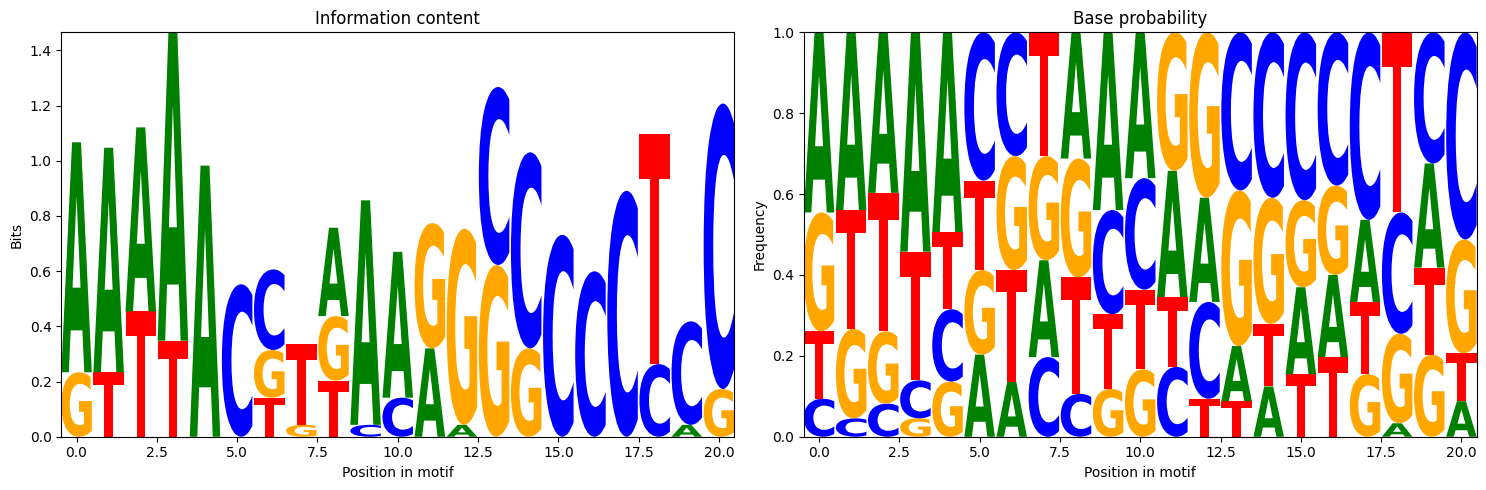

In [ ]:
if sequences:
    seq_objs = [Seq(seq) for seq in sequences]

    m = motifs.create(seq_objs)


    info_content = m.counts.normalize(pseudocounts=0.5).log_odds()
    info_content_df = pd.DataFrame(info_content)
    info_content_df[info_content_df < 0] = 0


    base_prob = m.counts.normalize(pseudocounts=0.5)
    base_prob_df = pd.DataFrame(base_prob, columns=list("ACGT"))


    fig, axes = plt.subplots(1, 2, figsize=(15, 5))


    logomaker.Logo(info_content_df, ax=axes[0])
    axes[0].set_title('Information content')
    axes[0].set_ylabel('Bits')
    axes[0].set_xlabel('Position in motif')


    logomaker.Logo(base_prob_df, ax=axes[1])
    axes[1].set_title('Base probability')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xlabel('Position in motif')

    plt.tight_layout()
    plt.show()
else:
    print("No sequences were available for motif creation.")

In [164]:
!samtools view -b -o CLIP-let7f-1.bam ../binfo1-datapack1/CLIP-35L33G.bam chr13:48691305-48691393

In [165]:
!head CLIP-let7f-1.pileup

chr13	48691290	N	1	^Gg	A
chr13	48691291	N	26	c^Hc^Ic^Dc^Hc^Gc^Ic^Gc^Ic^Gc^Ic^Ic^Hc^Hc^Hc^Ec^Ic^Ic^Ic^Hc^Hc^Hc^Ic^Ic^Ic^Hc	DDI4G>I@H;GGGFH7IHIHHHFIIG
chr13	48691292	N	25	aaaaaaaaaaaaaaaaaaaaaaaaa	DGIG>IBI?IIGHH7HIEHFFGHIG
chr13	48691293	N	38	gggggggggggggggggggggggggg^Ig^Hg^Ig^Ig^Ig^Ig^Hg^Ig^Ig^Dg^Ig^Ig	DGI4>AIGIBIIGGE/IIIDGHIIIHEGIHIIBIIBII
chr13	48691294	N	49	cccccccccccccccccccccccccccccccccccccc^Ec^Hc^Ic^Hc^Hc^Gc^Ic^Ic^Gc^Ic^Hc	?>I1E5IDG<I>EHH7IIIFHHEIHGCEDIHIEHG?II3BIDD7IHGGH
chr13	48691295	N	58	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ha^Ia^Ha^Ha^Ha^Ia^Ia^Ia^Ha	BDI?HBIGHGIHGHG7IIIGBGIIIGBEFIIIBIH=II=EIGA6IHGIHDIHGGIII0
chr13	48691296	N	81	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ia^Da^Ia^Ha^Ia^Ha^Ga^Ha^Ha^Ga^Ia^Ha^Ha^Ia^Ha^Ha^Ia^Ha^Ia^Ga^Ia^Ga	<GI7H?IGIEIIGHG;FIIGGHIIIGIBGDIHGII@II9FHDA9IIGGHGIEGGIIIBEIBIHIG;DG?IBHICGIHI6I;
chr13	48691297	N	80	gggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggg	8EI.HBIGIGIGGHG1IIIGGGIIIEIB

In [166]:
!samtools mpileup -f mm9.fa CLIP-let7f-1.bam > CLIP-let7f.pileup
!head CLIP-let7g.pileup

[mpileup] 1 samples in 1 input files
chr9	106007092	A	9	^G,^I,^H,^I,^G,^G,^H,^I,^I,	<IFIGGHII
chr9	106007093	T	9	ggggggggg	AFGIEGDII
chr9	106007094	C	9	,,,,,,,,,	EHHIGAFEH
chr9	106007095	a	9	,,,,,,,,,	?HDIFA>II
chr9	106007096	t	9	aaaaaaaaa	EHHIG@CHH
chr9	106007097	t	9	,,,,,,,,,	=HGEGDFII
chr9	106007098	g	9	aaaaaaaaa	?HHIGDEII
chr9	106007099	g	9	,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc,-2gc	?IEHGEDII
chr9	106007100	g	9	*********	8IBIBC@EI
chr9	106007101	c	9	*********	8IBIBC@EI


In [167]:
!samtools quickcheck CLIP-let7f-1.bam

In [168]:
!grep 'chr13' gencode.gtf | grep '48691305' | grep '48691393'
!samtools view CLIP-let7f-1.bam chr13:48691305-48691393 | head

chr13	ENSEMBL	gene	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; level 3; mgi_id "MGI:2676798";
chr13	ENSEMBL	transcript	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";
chr13	ENSEMBL	exon	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; exon_number 1; exon_id "ENSMUSE00001348852.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";
[E::idx_find_and_load] Could not retrieve index file for 'CLIP-let7f-1.bam'
[main_samview] random alignment retrieval only works for indexed BAM or CRAM files.


In [172]:
!samtools index CLIP-let7f-1.bam

In [173]:
bam_file = 'CLIP-let7f-1.bam'
region = 'chr13:48691305-48691393'

In [176]:
!samtools view CLIP-let7f-1.bam chr13:48691305-48691393 | head

SRR458758.18823786	16	chr13	48691290	38	49M	*	0	0	GCAGCAAGTCTACTCCTCAGGGAAGGCAATAGATTGTATAGTTATCTCC	ADDD?B<8+<?8A?>B=;A><@GGCCEEB<CCEDB2F>@<GGGGDDBG@	MD:Z:49	NH:i:1	HI:i:1	NM:i:0	SM:i:38	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-	XY:Z:+ENSMUST00000181490.4:641..689
SRR458758.1777812	16	chr13	48691291	39	49M	*	0	0	CAGCAAGTCTACTCCTCAGGGAAGGCAATAGATTGTATAGTTATCTCCT	DGG>DGEG<CFED??GGGEGHHHHDGEFBBGGDGGGEEG?A<BBB=;?C	MD:Z:49	NH:i:1	HI:i:1	NM:i:0	SM:i:39	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-	XY:Z:+ENSMUST00000181490.4:640..688
SRR458758.3300660	16	chr13	48691291	40	49M	*	0	0	CAGCAAGTCTACTCCTCAGGGAAGGCAATAGATTGTATAGTTATCTCCT	IIIIIIIIIIEIHIIHIIIIIIIIIIIIHIIIIIIIIIIIIIIIIIIIE	MD:Z:49	NH:i:1	HI:i:1	NM:i:0	SM:i:40	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-	XY:Z:+ENSMUST00000181490.4:640..688
SRR458758.3560440	16	chr13	48691291	35	48M	*	0	0	CAGCAAGTCTACTCCTCAGGGAAGGCAATAGATTGTATAGTTATCTCT	4)41?7.473+>1BB0B?>77;;9:=@:@9;@D@DDDB5.555(536;	MD:Z:47C	NH:i:1	HI:i:1	NM:i:1	SM:i:35	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-	XY:Z:+ENSMUST00000181490.4:6

In [179]:
def extract_uniform_length_sequences(bam_file, region='chr13:48691305-48691393', flank=10):
    samfile = pysam.AlignmentFile(bam_file, "rb")
    sequences = []

    region_split = region.split(':')
    chr_name = region_split[0]
    start, end = map(int, region_split[1].split('-'))

    # Calculate the midpoint of the region
    midpoint = (start + end) // 2

    print(f"Fetching reads from {chr_name}:{start}-{end}")  # 디버깅 출력

    for read in samfile.fetch(chr_name, start, end):
        print(f"Read found: {read.query_name}, Length: {len(read.query_sequence)}")  # 디버깅 출력
        seq = read.query_sequence
        if len(seq) >= 2 * flank + 1:  # Ensure the sequence is long enough
            seq_start = max(0, len(seq)//2 - flank)
            seq_end = seq_start + 2 * flank + 1
            extracted_seq = seq[seq_start:seq_end]
            sequences.append(extracted_seq)
        else:
            print(f"Skipping read {read.query_name} due to insufficient length: {len(seq)}")  # 디버깅 출력

    samfile.close()
    return sequences

sequences = extract_uniform_length_sequences(bam_file, region)
print("Extracted Sequences:", sequences)  # Debugging: Print extracted sequences

# 추출된 서열 확인
if len(sequences) == 0:
    print("No sequences were extracted. Please check the region coordinates and BAM file.")
else:
    print(f"Extracted {len(sequences)} sequences.")

Fetching reads from chr13:48691305-48691393
Read found: SRR458758.18823786, Length: 49
Read found: SRR458758.1777812, Length: 49
Read found: SRR458758.3300660, Length: 49
Read found: SRR458758.3560440, Length: 48
Read found: SRR458758.5986971, Length: 48
Read found: SRR458758.6036048, Length: 49
Read found: SRR458758.6867654, Length: 48
Read found: SRR458758.8889228, Length: 48
Read found: SRR458758.9839350, Length: 49
Read found: SRR458758.12448944, Length: 48
Read found: SRR458758.12897742, Length: 49
Read found: SRR458758.13409001, Length: 49
Read found: SRR458758.15001584, Length: 49
Read found: SRR458758.15216193, Length: 49
Read found: SRR458758.17780589, Length: 49
Read found: SRR458758.18855544, Length: 49
Read found: SRR458758.19660711, Length: 48
Read found: SRR458758.22228438, Length: 49
Read found: SRR458758.22284113, Length: 49
Read found: SRR458758.23011837, Length: 48
Read found: SRR458758.23910612, Length: 49
Read found: SRR458758.23997926, Length: 49
Read found: SRR458

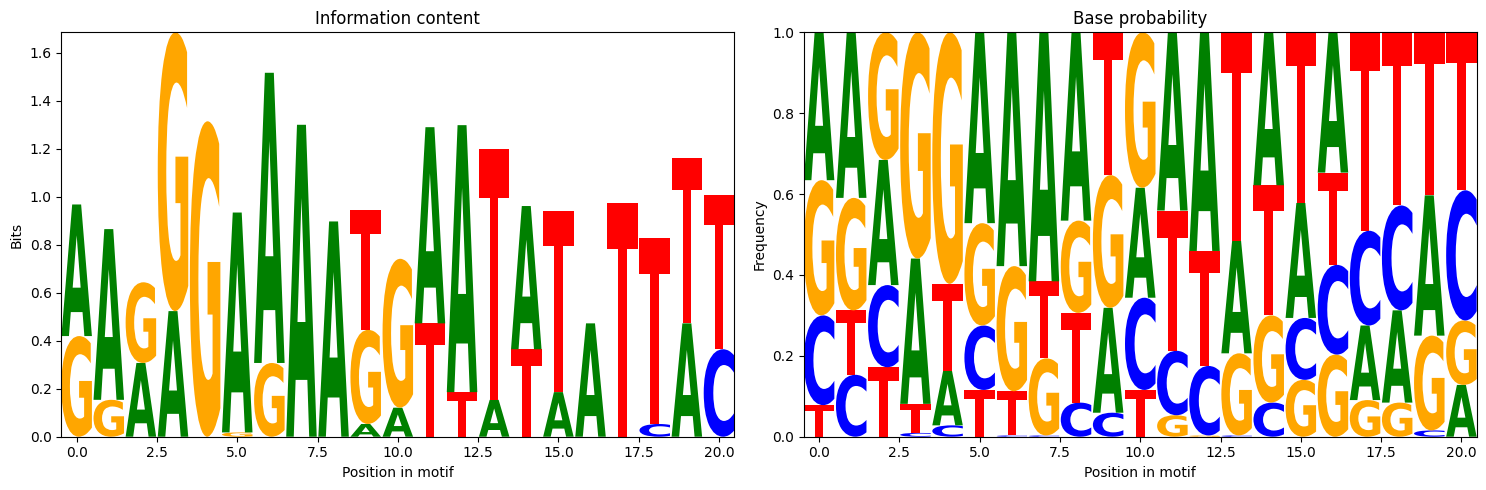

In [181]:
if sequences:
    seq_objs = [Seq(seq) for seq in sequences]

    m = motifs.create(seq_objs)


    info_content = m.counts.normalize(pseudocounts=0.5).log_odds()
    info_content_df = pd.DataFrame(info_content)
    info_content_df[info_content_df < 0] = 0


    base_prob = m.counts.normalize(pseudocounts=0.5)
    base_prob_df = pd.DataFrame(base_prob, columns=list("ACGT"))


    fig, axes = plt.subplots(1, 2, figsize=(15, 5))


    logomaker.Logo(info_content_df, ax=axes[0])
    axes[0].set_title('Information content')
    axes[0].set_ylabel('Bits')
    axes[0].set_xlabel('Position in motif')


    logomaker.Logo(base_prob_df, ax=axes[1])
    axes[1].set_title('Base probability')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xlabel('Position in motif')

    plt.tight_layout()
    plt.show()
else:
    print("No sequences were available for motif creation.")

In [183]:
!samtools view -b -o CLIP-let7d.bam ../binfo1-datapack1/CLIP-35L33G.bam chr13:48689488-48689590
!head CLIP-let7d.pileup

chr13	48689488	N	24	^Ga^Ia^Ha^Ia^Ha^Ia^Ia^Ia^Ga^Ia^Ia^Ia^Ia^Ia^Ha^Ia^Ga^Ga^Ga^Ia^Ea^Da^Ha^Ga	BIHGGIHIEIIIGIHIGEGH5BDD
chr13	48689489	N	53	aaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia^Ga^Ga^Ia^Ia^Ha^Ia^Ia^Ha^Ha^Da^Ia^Ha^Ia^Ia^Ia^Ia^Ia^Ha^Ga^Ga	GIHIGIIIEIIIIIHIG>EB4@5HDIHIBEGIID?IIGII@H>IGHIIIGHDC
chr13	48689490	N	69	ttttttttttttttttttttttttttttttttttttttttttttttttttttt^Gt^Gt^Ht^Gt^It^It^Ht^It^Gt^Gt^Ht^It^It^It^Ht^It	GIHIGHIFFIIIIIFHGEDG;2>FDIHIDGBIIDBIIDIIAH>IBGIIIGHBG=BG=IIGIDGHFIIHI
chr13	48689491	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ia^Ha^Ga^Ia^Ga^Ia^Ga^Ha^Ha^Ha^Ga^Ia^Ha^Ha^Ia^@a^Ia^Ia^Ia^Ga^Ha^Ha^Ga^Ha^Ga^Ia^Ha^Ga^Ia^Ga^Ha^Ga^Ia^Ia^Ga	EIGHEHHIEIIIIIHIGCBH:?>HGGHI>GBIIGBIIGIHBB;IHIIIIGHDC3=G:IGGIDEHIFIGHII=GIDHEGHHEIGGI7III9=HGBAIGBIGFG>I2
chr13	48689492	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa	GIGIEIEI7IIIGIGIG;?F:D@G7GHIAGAIIG3IIGIHDB2IHIIIIDDGC1<GCIIHIGCHIIIEIIIGCI

In [184]:
!samtools quickcheck CLIP-let7d.bam

In [185]:
!grep 'chr13' gencode.gtf | grep '48689488' | grep '48689590'
!samtools view CLIP-let7d.bam chr13:48689488-48689590 | head

chr13	ENSEMBL	gene	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; gene_type "miRNA"; gene_name "Mirlet7d"; level 3; mgi_id "MGI:2676796";
chr13	ENSEMBL	transcript	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";
chr13	ENSEMBL	exon	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; exon_number 1; exon_id "ENSMUSE00000522678.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";
[E::idx_find_and_load] Could not retrieve index file for 'CLIP-let7d.bam'
[main_samview] random alignment retrieval only works for indexed BAM or CRAM files.


In [186]:
!samtools index CLIP-let7d.bam

In [187]:
bam_file = 'CLIP-let7d.bam'
region = 'chr13:48689488-48689590'

In [190]:
def extract_uniform_length_sequences(bam_file, region='chr13:48689488-48689590', flank=10):
    samfile = pysam.AlignmentFile(bam_file, "rb")
    sequences = []

    region_split = region.split(':')
    chr_name = region_split[0]
    start, end = map(int, region_split[1].split('-'))

    # Calculate the midpoint of the region
    midpoint = (start + end) // 2

    print(f"Fetching reads from {chr_name}:{start}-{end}")  # 디버깅 출력

    for read in samfile.fetch(chr_name, start, end):
        print(f"Read found: {read.query_name}, Length: {len(read.query_sequence)}")  # 디버깅 출력
        seq = read.query_sequence
        if len(seq) >= 2 * flank + 1:  # Ensure the sequence is long enough
            seq_start = max(0, len(seq)//2 - flank)
            seq_end = seq_start + 2 * flank + 1
            extracted_seq = seq[seq_start:seq_end]
            sequences.append(extracted_seq)
        else:
            print(f"Skipping read {read.query_name} due to insufficient length: {len(seq)}")  # 디버깅 출력

    samfile.close()
    return sequences

sequences = extract_uniform_length_sequences(bam_file, region)
print("Extracted Sequences:", sequences)  # Debugging: Print extracted sequences

# 추출된 서열 확인
if len(sequences) == 0:
    print("No sequences were extracted. Please check the region coordinates and BAM file.")
else:
    print(f"Extracted {len(sequences)} sequences.")

Fetching reads from chr13:48689488-48689590
Read found: SRR458758.2334592, Length: 63
Read found: SRR458758.3105634, Length: 64
Read found: SRR458758.3885278, Length: 63
Read found: SRR458758.4069060, Length: 64
Read found: SRR458758.4875503, Length: 64
Read found: SRR458758.6659859, Length: 63
Read found: SRR458758.8610531, Length: 64
Read found: SRR458758.10671962, Length: 64
Read found: SRR458758.10880208, Length: 63
Read found: SRR458758.11633425, Length: 64
Read found: SRR458758.11849558, Length: 64
Read found: SRR458758.12838497, Length: 64
Read found: SRR458758.13607186, Length: 64
Read found: SRR458758.13669717, Length: 64
Read found: SRR458758.14057016, Length: 64
Read found: SRR458758.16432138, Length: 64
Read found: SRR458758.18776460, Length: 63
Read found: SRR458758.18994055, Length: 64
Read found: SRR458758.19727617, Length: 64
Read found: SRR458758.21859778, Length: 63
Read found: SRR458758.23014335, Length: 64
Read found: SRR458758.26705473, Length: 64
Read found: SRR45

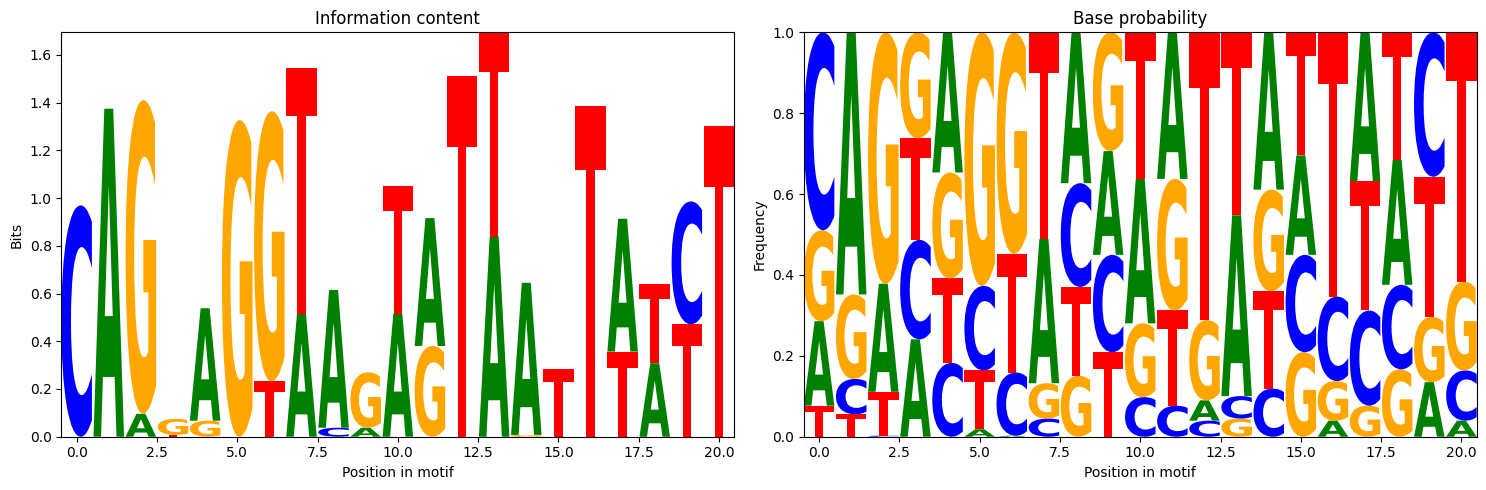

In [191]:
if len(sequences) == 0:
    print("No sequences were extracted. Please check the region coordinates and BAM file.")

if sequences:
    seq_objs = [Seq(seq) for seq in sequences]

    m = motifs.create(seq_objs)


    info_content = m.counts.normalize(pseudocounts=0.5).log_odds()
    info_content_df = pd.DataFrame(info_content)
    info_content_df[info_content_df < 0] = 0


    base_prob = m.counts.normalize(pseudocounts=0.5)
    base_prob_df = pd.DataFrame(base_prob, columns=list("ACGT"))


    fig, axes = plt.subplots(1, 2, figsize=(15, 5))


    logomaker.Logo(info_content_df, ax=axes[0])
    axes[0].set_title('Information content')
    axes[0].set_ylabel('Bits')
    axes[0].set_xlabel('Position in motif')


    logomaker.Logo(base_prob_df, ax=axes[1])
    axes[1].set_title('Base probability')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xlabel('Position in motif')

    plt.tight_layout()
    plt.show()
else:
    print("No sequences were available for motif creation.")